<h1>0. Checking libraries</h1>

To check the availability of all the libraries

In [1]:
import matplotlib
import networkx
import numpy
import sklearn
import scipy

import dwave_networkx
import dimod
import minorminer
import qiskit
import qiskit.aqua

This part is to check if the link between my local device and IBMQ account is properly linked or not

In [1]:
from qiskit import IBMQ

#IBMQ.save_account('#enter your token api') # this has to be executed only for the first time when you setup the environemnt

In [2]:
IBMQ.load_account()

C:\Users\deathstroke\.conda\envs\13aug_tf-gpu-cuda8\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# 1. Hello World Circuit

## 1.1 Importing all required libraries

In [1]:
from qiskit import QuantumCircuit,ClassicalRegister,QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector,plot_state_city
import numpy as np

## 1.2 Initializing backend

In [2]:
n=np.pi

backend=BasicAer.get_backend('qasm_simulator')

q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)

## 1.3 Adding gates

In [3]:
qc.h(q[0])
qc.measure(q,c)

## 1.4 Executing the circuit

In [4]:
job=execute(qc,backend,shots=100)

## 1.5 Results

### 1.5.1 Probability results

In [5]:
result=job.result()
result.get_counts(qc)

{'0': 47, '1': 53}

### 1.5.2 Statevector/Bloch Sphere Results

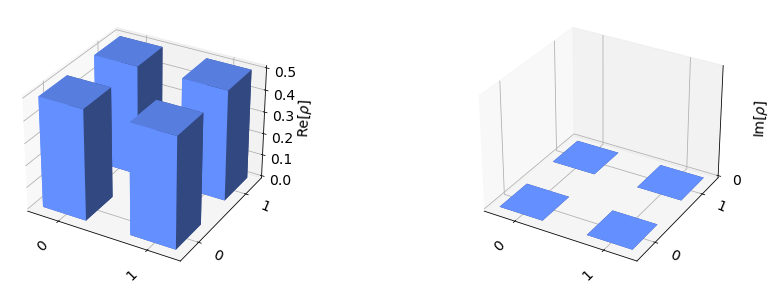

In [6]:
backend_statevector=BasicAer.get_backend('statevector_simulator')
qc1=QuantumCircuit(q,c)
qc1.i(q[0])
qc1.h(q[0])
job_statevector=execute(qc1,backend_statevector)
#plot state city visualization
plot_state_city(job_statevector.result().get_statevector(qc1))

### Unknown Error (resolved by updating the utils.py file in the qiskit/visualization folder)

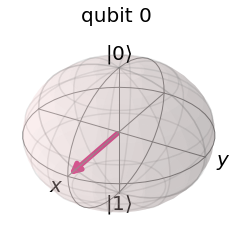

In [7]:
from qiskit.quantum_info import Statevector
plot_bloch_multivector(job_statevector.result().get_statevector())

### 1.5.3 Plot histogram

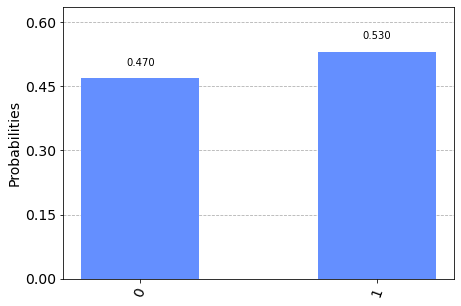

In [8]:
plot_histogram(job.result().get_counts(qc))